In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from keras import layers
from keras import metrics
from keras import optimizers
import numpy as np
import datetime
%load_ext tensorboard

c:\Program Files\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


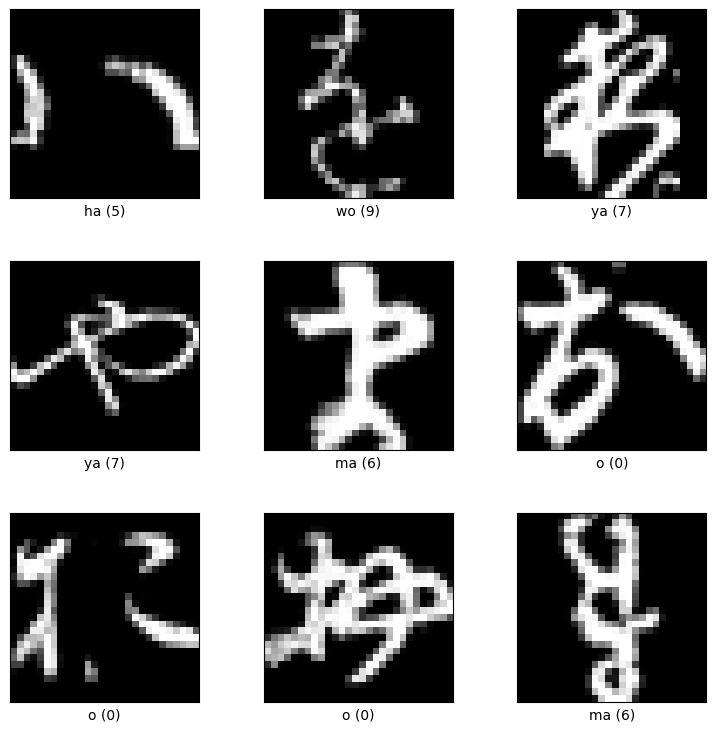

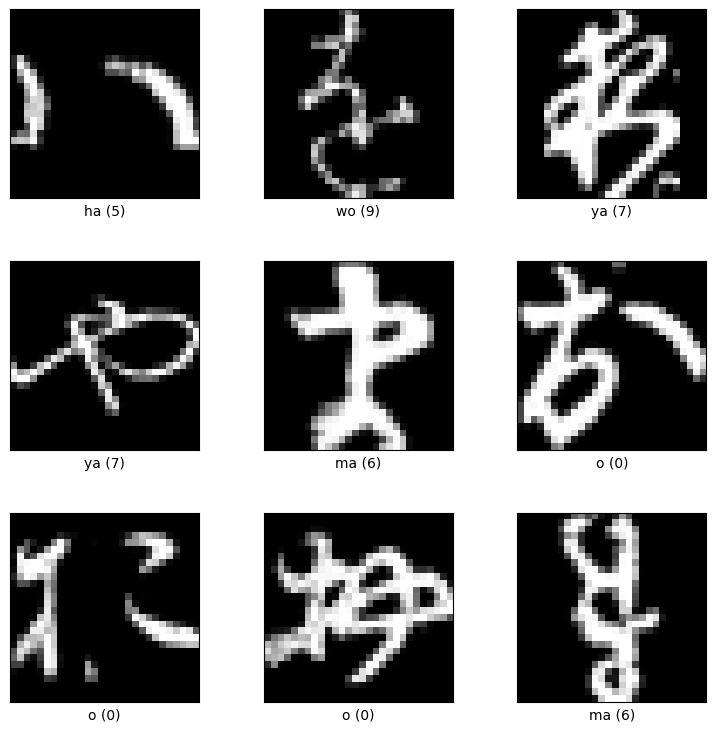

In [2]:
train, train_info = tfds.load(
    name='kmnist', split='train', shuffle_files=True, with_info=True)
test, test_info = tfds.load(
    name='kmnist', split='test', shuffle_files=False, with_info=True)
tfds.show_examples(test, test_info)


In [3]:
model = keras.Sequential(
    [
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(256, activation="gelu"),
        layers.Dense(256, activation="gelu"),
        layers.Dense(256, activation="gelu"),
        layers.Dense(10, activation="softmax"),
    ]
)

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 335,114
Trainable params: 335,114
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(
    optimizer=optimizers.adamw.AdamW(), loss="sparse_categorical_crossentropy", metrics=[metrics.SparseCategoricalAccuracy()])


In [5]:
def normalize_img(x):
    return (tf.cast(x['image'], tf.float32)/255.0) - 0.5, x['label']


In [6]:
ds_train = train.map(normalize_img)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(train_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)


In [7]:
ds_test = test.map(normalize_img)
ds_test = ds_test.cache()
ds_test = ds_test.shuffle(test_info.splits['test'].num_examples)
ds_test = ds_test.batch(128)
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)


In [8]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir, histogram_freq=1)

In [9]:
history = model.fit(ds_train, epochs=10, validation_data=ds_test, callbacks=[tensorboard_callback])

Epoch 1/10
469/469 [==============================] - 3s 4ms/step - loss: 0.4087 - sparse_categorical_accuracy: 0.8715 - val_loss: 0.4682 - val_sparse_categorical_accuracy: 0.8572
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1726 - sparse_categorical_accuracy: 0.9461 - val_loss: 0.4102 - val_sparse_categorical_accuracy: 0.8787
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1180 - sparse_categorical_accuracy: 0.9626 - val_loss: 0.3737 - val_sparse_categorical_accuracy: 0.8942
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0821 - sparse_categorical_accuracy: 0.9735 - val_loss: 0.3981 - val_sparse_categorical_accuracy: 0.8952
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0637 - sparse_categorical_accuracy: 0.9796 - val_loss: 0.3780 - val_sparse_categorical_accuracy: 0.9029
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0475 - sparse_categorica

In [15]:
%tensorboard --logdir logs/fit/classification

Text(0.5, 0, 'Epoch')

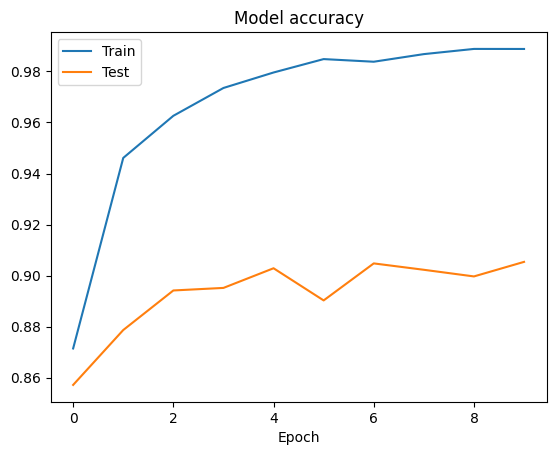

In [51]:
import matplotlib.pyplot as plt
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

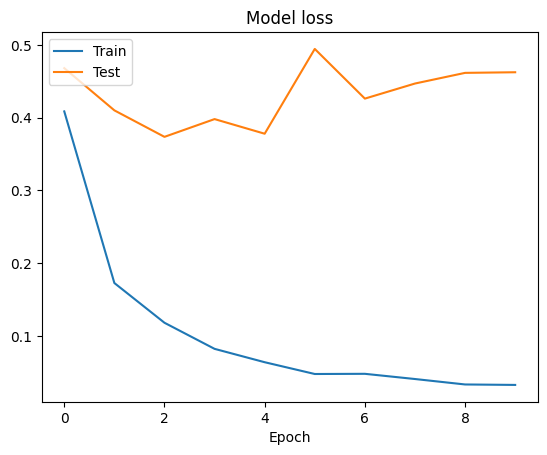

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.xlabel('Epoch')

In [35]:
ds_test = test.map(normalize_img)
ds_test = ds_test.cache()
ds_test = ds_test.shuffle(test_info.splits['test'].num_examples, reshuffle_each_iteration=False)
ds_test = ds_test.batch(8) #8 example images
random_test = ds_test.take(1)

In [36]:
predictions = model.predict(random_test)

1/1 [==============================] - 1s 637ms/step


In [37]:
imgs, labels = next(iter(random_test))
for i in range(len(predictions)):
    print(f'Prediction: {np.argmax(predictions[i], axis=-1)}\t', f'Label: {labels[i].numpy()}')


Prediction: 1	 Label: 1
Prediction: 4	 Label: 4
Prediction: 1	 Label: 1
Prediction: 5	 Label: 4
Prediction: 3	 Label: 3
Prediction: 9	 Label: 9
Prediction: 9	 Label: 9
Prediction: 4	 Label: 4


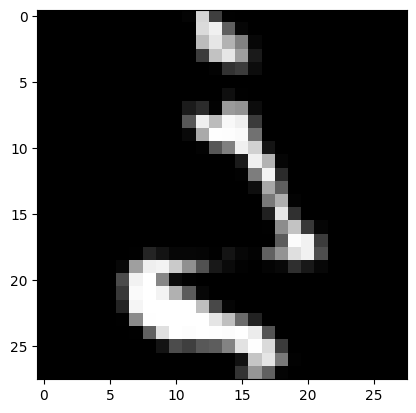

In [45]:
plt.imshow(np.array(imgs[0]).reshape((28,28)), cmap='gray')